# Data in 2 hours workshop

## Overview
In this workshop we are going to learn how to load, clean, and summarise data in Python!

Our goal is to understand which Boroughs of London have seen the greatest average house price increases over the last few years.

## Importing the libraries

In this case we are going to use the library pandas. You can find the documentation of the library [here](https://pandas.pydata.org/). This library is one of the most important libraries to analyse data in Python. It is connected with Numpy and Matplotlib libraries. Check more about these libraries [here](http://www.numpy.org/) and [here](https://matplotlib.org/).

In [1]:
# Import the libraries pandas, numpy, and matplotlib
# for matplotlib just load pyplot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Loading the data

In [2]:
# Reading the data from a website!
url_housepriceUK = "https://data.london.gov.uk/download/uk-house-price-index/70ac0766-8902-4eb5-aab5-01951aaed773/UK%20House%20price%20index-v2.xls"
# When we are reading an Excel file we need to specify the sheet name
houses = pd.read_excel(url_housepriceUK, sheet_name='Average price', index_col= None)

In [3]:
# Let's check the first 5 entries
houses.head()

City of London Barking & Dagenham     Barnet     Bexley      Brent  \
NaT             E09000001          E09000002  E09000003  E09000004  E09000005   
1995-01-01          91449            50460.2    93284.5    64958.1    71306.6   
1995-02-01        82202.8            51085.8    93190.2    64787.9    72022.3   
1995-03-01        79120.7              51269    92247.5    64367.5    72015.8   
1995-04-01        77101.2            53133.5    90762.9    64277.7    72965.6   

              Bromley     Camden    Croydon     Ealing    Enfield  \
NaT         E09000006  E09000007  E09000008  E09000009  E09000010   
1995-01-01    81671.5     120933    69158.2    79885.9    72514.7   
1995-02-01    81657.6     119509    68951.1    80897.1    73155.2   
1995-03-01    81449.3     120282    68712.4    81379.9    72190.4   
1995-04-01    81124.4     120098      68610    82188.9    71442.9   

               ...        NORTH WEST YORKS & THE HUMBER EAST MIDLANDS  \
NaT            ...               NaN                NaN           NaN   
1995-01-01     ...       43958.48001        44803.42878   45544.52227   
1995-02-01     ...       43925.42289        44528.80721   46051.57066   
1995-03-01     ...       44434.86810        45200.46775   45383.82395   
1995-04-01     ...       44267.77960        45614.34341   46124.23045   

           WEST MIDLANDS EAST OF ENGLAND       LONDON   SOUTH EAST  \
NaT                  NaN             NaN          NaN          NaN   
1995-01-01   48527.52339     56701.59610  74435.76052  64018.87894   
1995-02-01   49341.29029     56593.59475  72777.93709  63715.02399   
1995-03-01   49442.17973     56171.18278  73896.84204  64113.60858   
1995-04-01   49455.93299     56567.89582  74455.28754  64623.22395   

             SOUTH WEST Unnamed: 46      England  
NaT                 NaN         NaN          NaN  
1995-01-01  54705.15790         NaN  53202.77128  
1995-02-01  54356.14843         NaN  53096.15490  
1995-03-01  53583.07667         NaN  53201.28430  
1995-04-01  54786.01938         NaN  53590.85480  

[5 rows x 48 columns]

## Checking the data

In [4]:
# Let's have a look at the dimensions of the table
houses.shape

(289, 48)

In [5]:
# transposing a table in python is very easy, only use the function T 
houses_T = houses.T

In [6]:
# Check the head of the transposed dataframe
houses_T.head()

NaT 1995-01-01 1995-02-01 1995-03-01 1995-04-01  \
City of London      E09000001      91449    82202.8    79120.7    77101.2   
Barking & Dagenham  E09000002    50460.2    51085.8      51269    53133.5   
Barnet              E09000003    93284.5    93190.2    92247.5    90762.9   
Bexley              E09000004    64958.1    64787.9    64367.5    64277.7   
Brent               E09000005    71306.6    72022.3    72015.8    72965.6   

                   1995-05-01 1995-06-01 1995-07-01 1995-08-01 1995-09-01  \
City of London        84409.1    94900.5     110128     112329     104473   
Barking & Dagenham    53042.2    53700.3    52113.1    52232.2    51471.6   
Barnet                  90258    90107.2    91441.2    92361.3    93273.1   
Bexley                63997.1    64252.3    63722.7    64432.6    64509.5   
Brent                   73704    74310.5      74127      73547    73789.5   

                      ...     2018-03-01 2018-04-01 2018-05-01 2018-06-01  \
City of London        ...         753736     764068     819994     804559   
Barking & Dagenham    ...         292095     291115     290704     294719   
Barnet                ...         538519     542486     534739     526979   
Bexley                ...         340399     339648     337960     343329   
Brent                 ...         483336     486901     484866     495250   

                   2018-07-01 2018-08-01 2018-09-01 2018-10-01 2018-11-01  \
City of London         812442     797358     791125     779127     744331   
Barking & Dagenham     296164     296466     295845     300449     301950   
Barnet                 525372     536238     534654     537004     534398   
Bexley                 346974     348486     346025     345467     343820   
Brent                  507268     520496     514175     495037     471082   

                   2018-12-01  
City of London         795208  
Barking & Dagenham     303038  
Barnet                 538451  
Bexley                 346649  
Brent                  477811  

[5 rows x 289 columns]

In [7]:
# To reset the indices!
houses_T = houses_T.reset_index()

In [8]:
houses_T.head()

index        NaN 1995-01-01 00:00:00 1995-02-01 00:00:00  \
0      City of London  E09000001               91449             82202.8   
1  Barking & Dagenham  E09000002             50460.2             51085.8   
2              Barnet  E09000003             93284.5             93190.2   
3              Bexley  E09000004             64958.1             64787.9   
4               Brent  E09000005             71306.6             72022.3   

  1995-03-01 00:00:00 1995-04-01 00:00:00 1995-05-01 00:00:00  \
0             79120.7             77101.2             84409.1   
1               51269             53133.5             53042.2   
2             92247.5             90762.9               90258   
3             64367.5             64277.7             63997.1   
4             72015.8             72965.6               73704   

  1995-06-01 00:00:00 1995-07-01 00:00:00 1995-08-01 00:00:00  \
0             94900.5              110128              112329   
1             53700.3             52113.1             52232.2   
2             90107.2             91441.2             92361.3   
3             64252.3             63722.7             64432.6   
4             74310.5               74127               73547   

          ...         2018-03-01 00:00:00 2018-04-01 00:00:00  \
0         ...                      753736              764068   
1         ...                      292095              291115   
2         ...                      538519              542486   
3         ...                      340399              339648   
4         ...                      483336              486901   

  2018-05-01 00:00:00 2018-06-01 00:00:00 2018-07-01 00:00:00  \
0              819994              804559              812442   
1              290704              294719              296164   
2              534739              526979              525372   
3              337960              343329              346974   
4              484866              495250              507268   

  2018-08-01 00:00:00 2018-09-01 00:00:00 2018-10-01 00:00:00  \
0              797358              791125              779127   
1              296466              295845              300449   
2              536238              534654              537004   
3              348486              346025              345467   
4              520496              514175              495037   

  2018-11-01 00:00:00 2018-12-01 00:00:00  
0              744331              795208  
1              301950              303038  
2              534398              538451  
3              343820              346649  
4              471082              477811  

[5 rows x 290 columns]

In [9]:
# Let's check the column names
houses_T.columns

Index([            'index',                 NaT, 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2018-03-01 00:00:00, 2018-04-01 00:00:00, 2018-05-01 00:00:00,
       2018-06-01 00:00:00, 2018-07-01 00:00:00, 2018-08-01 00:00:00,
       2018-09-01 00:00:00, 2018-10-01 00:00:00, 2018-11-01 00:00:00,
       2018-12-01 00:00:00],
      dtype='object', length=290)

## Change columns names

In [10]:
# Change the name of a column
# in this case the parameter columns require a dictionary
houses_T = houses_T.rename(columns = {'index':'Borough', pd.NaT: 'ID'})

In [11]:
houses_T.columns

Index([          'Borough',                'ID', 1995-01-01 00:00:00,
       1995-02-01 00:00:00, 1995-03-01 00:00:00, 1995-04-01 00:00:00,
       1995-05-01 00:00:00, 1995-06-01 00:00:00, 1995-07-01 00:00:00,
       1995-08-01 00:00:00,
       ...
       2018-03-01 00:00:00, 2018-04-01 00:00:00, 2018-05-01 00:00:00,
       2018-06-01 00:00:00, 2018-07-01 00:00:00, 2018-08-01 00:00:00,
       2018-09-01 00:00:00, 2018-10-01 00:00:00, 2018-11-01 00:00:00,
       2018-12-01 00:00:00],
      dtype='object', length=290)

## Tidy data

**The two most important properties of tidy data are:**

1. **Each column is a variable.**

2. **Each row is an observation.**

In [12]:
# 'Melt' the data will help us create a tidy dataset, which always has an observation in each row,
## and a single variable in each column
df = pd.melt(houses_T, id_vars= ['Borough', 'ID'])

In [13]:
df.head()

Borough         ID   variable    value
0      City of London  E09000001 1995-01-01    91449
1  Barking & Dagenham  E09000002 1995-01-01  50460.2
2              Barnet  E09000003 1995-01-01  93284.5
3              Bexley  E09000004 1995-01-01  64958.1
4               Brent  E09000005 1995-01-01  71306.6

In [14]:
#Re-name the column names
df = df.rename(columns = {'variable':'Time', 'value': 'Average_price'})

In [15]:
df.head()

Borough         ID       Time Average_price
0      City of London  E09000001 1995-01-01         91449
1  Barking & Dagenham  E09000002 1995-01-01       50460.2
2              Barnet  E09000003 1995-01-01       93284.5
3              Bexley  E09000004 1995-01-01       64958.1
4               Brent  E09000005 1995-01-01       71306.6

In [16]:
# To check the data type use the function dtypes
df.dtypes

Borough                  object
ID                       object
Time             datetime64[ns]
Average_price            object
dtype: object

The average price should be a number type, specifically a float number!

In [17]:
# Change the type of a whole column
df['Average_price'] = pd.to_numeric(df['Average_price'])

In [18]:
df.dtypes

Borough                  object
ID                       object
Time             datetime64[ns]
Average_price           float64
dtype: object

In [19]:
# How many data points are in each column
df.count()

Borough          13824
ID                9504
Time             13824
Average_price    12960
dtype: int64

### Question
Why there are less data points in the variable ID and Average Price?

In [20]:
# We are gpoing to check wich Boroughs are in the column `Borough` using the function `.unique()`
df['Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 33',
       'Inner London', 'Outer London', 'Unnamed: 36', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 46', 'England'], dtype=object)

**IMPORTANT**
As you can see, some of the categories in the column `Borough` are not borougs at all (e.g. `YORKS & THE HUMBER`), some of them have a very strange name (e.g. `Unnamed: 33`)

In [21]:
# Let's check the first elements of the rows where the value for `Borough` is 'Unnamed: 33'
df[df['Borough'] == 'Unnamed: 33'].head()

Borough   ID       Time  Average_price
33   Unnamed: 33  NaN 1995-01-01            NaN
81   Unnamed: 33  NaN 1995-02-01            NaN
129  Unnamed: 33  NaN 1995-03-01            NaN
177  Unnamed: 33  NaN 1995-04-01            NaN
225  Unnamed: 33  NaN 1995-05-01            NaN

In [22]:
# # Let's check the first elements of the rows where the value for `Borough` is 'Unnamed: 36'
df[df['Borough'] == 'Unnamed: 36'].head()

Borough   ID       Time  Average_price
36   Unnamed: 36  NaN 1995-01-01            NaN
84   Unnamed: 36  NaN 1995-02-01            NaN
132  Unnamed: 36  NaN 1995-03-01            NaN
180  Unnamed: 36  NaN 1995-04-01            NaN
228  Unnamed: 36  NaN 1995-05-01            NaN

## NaN data points

As you can see, this elements do not contain valuable information and we might want to drop that data rows


In [23]:
# Lets check a dataframe, only with NaN values in the ID
df[df['ID'].isna()]

Borough   ID       Time  Average_price
33            Unnamed: 33  NaN 1995-01-01            NaN
34           Inner London  NaN 1995-01-01    78251.97650
35           Outer London  NaN 1995-01-01    72958.79836
36            Unnamed: 36  NaN 1995-01-01            NaN
37             NORTH EAST  NaN 1995-01-01    42076.35411
38             NORTH WEST  NaN 1995-01-01    43958.48001
39     YORKS & THE HUMBER  NaN 1995-01-01    44803.42878
40          EAST MIDLANDS  NaN 1995-01-01    45544.52227
41          WEST MIDLANDS  NaN 1995-01-01    48527.52339
42        EAST OF ENGLAND  NaN 1995-01-01    56701.59610
43                 LONDON  NaN 1995-01-01    74435.76052
44             SOUTH EAST  NaN 1995-01-01    64018.87894
45             SOUTH WEST  NaN 1995-01-01    54705.15790
46            Unnamed: 46  NaN 1995-01-01            NaN
47                England  NaN 1995-01-01    53202.77128
81            Unnamed: 33  NaN 1995-02-01            NaN
82           Inner London  NaN 1995-02-01    75885.70201
83           Outer London  NaN 1995-02-01    72937.88262
84            Unnamed: 36  NaN 1995-02-01            NaN
85             NORTH EAST  NaN 1995-02-01    42571.98949
86             NORTH WEST  NaN 1995-02-01    43925.42289
87     YORKS & THE HUMBER  NaN 1995-02-01    44528.80721
88          EAST MIDLANDS  NaN 1995-02-01    46051.57066
89          WEST MIDLANDS  NaN 1995-02-01    49341.29029
90        EAST OF ENGLAND  NaN 1995-02-01    56593.59475
91                 LONDON  NaN 1995-02-01    72777.93709
92             SOUTH EAST  NaN 1995-02-01    63715.02399
93             SOUTH WEST  NaN 1995-02-01    54356.14843
94            Unnamed: 46  NaN 1995-02-01            NaN
95                England  NaN 1995-02-01    53096.15490
...                   ...  ...        ...            ...
13761         Unnamed: 33  NaN 2018-11-01            NaN
13762        Inner London  NaN 2018-11-01   574124.47550
13763        Outer London  NaN 2018-11-01   427964.36340
13764         Unnamed: 36  NaN 2018-11-01            NaN
13765          NORTH EAST  NaN 2018-11-01   129337.01260
13766          NORTH WEST  NaN 2018-11-01   163691.58350
13767  YORKS & THE HUMBER  NaN 2018-11-01   161838.04480
13768       EAST MIDLANDS  NaN 2018-11-01   193166.25650
13769       WEST MIDLANDS  NaN 2018-11-01   196418.47780
13770     EAST OF ENGLAND  NaN 2018-11-01   292830.78670
13771              LONDON  NaN 2018-11-01   473371.65760
13772          SOUTH EAST  NaN 2018-11-01   324322.29390
13773          SOUTH WEST  NaN 2018-11-01   257258.99340
13774         Unnamed: 46  NaN 2018-11-01            NaN
13775             England  NaN 2018-11-01   247218.67900
13809         Unnamed: 33  NaN 2018-12-01            NaN
13810        Inner London  NaN 2018-12-01   571467.31150
13811        Outer London  NaN 2018-12-01   427862.03520
13812         Unnamed: 36  NaN 2018-12-01            NaN
13813          NORTH EAST  NaN 2018-12-01   128756.22820
13814          NORTH WEST  NaN 2018-12-01   164351.70910
13815  YORKS & THE HUMBER  NaN 2018-12-01   165119.42120
13816       EAST MIDLANDS  NaN 2018-12-01   192747.54930
13817       WEST MIDLANDS  NaN 2018-12-01   200388.03150
13818     EAST OF ENGLAND  NaN 2018-12-01   289602.18560
13819              LONDON  NaN 2018-12-01   473821.96360
13820          SOUTH EAST  NaN 2018-12-01   324729.24590
13821          SOUTH WEST  NaN 2018-12-01   256427.46370
13822         Unnamed: 46  NaN 2018-12-01            NaN
13823             England  NaN 2018-12-01   247885.69000

[4320 rows x 4 columns]

In [24]:
# How are we going to deal with NaN values?
# in this case it seems that there were original empty entries
# Challenge 1: find two different ways to drop NaN values 

## First method
# filtering

df_clean1 = df[df['Average_price'].notna()]
df_clean1.head(48)

Borough         ID       Time  Average_price
0         City of London  E09000001 1995-01-01    91448.98487
1     Barking & Dagenham  E09000002 1995-01-01    50460.22660
2                 Barnet  E09000003 1995-01-01    93284.51832
3                 Bexley  E09000004 1995-01-01    64958.09036
4                  Brent  E09000005 1995-01-01    71306.56698
5                Bromley  E09000006 1995-01-01    81671.47692
6                 Camden  E09000007 1995-01-01   120932.88810
7                Croydon  E09000008 1995-01-01    69158.16225
8                 Ealing  E09000009 1995-01-01    79885.89069
9                Enfield  E09000010 1995-01-01    72514.69096
10             Greenwich  E09000011 1995-01-01    62300.10169
11               Hackney  E09000012 1995-01-01    61296.52637
12  Hammersmith & Fulham  E09000013 1995-01-01   124902.86020
13              Haringey  E09000014 1995-01-01    76287.56947
14                Harrow  E09000015 1995-01-01    84769.52599
15              Havering  E09000016 1995-01-01    68000.13774
16            Hillingdon  E09000017 1995-01-01    73834.82964
17              Hounslow  E09000018 1995-01-01    72231.70537
18             Islington  E09000019 1995-01-01    92516.48557
19  Kensington & Chelsea  E09000020 1995-01-01   182694.83260
20  Kingston upon Thames  E09000021 1995-01-01    80875.84843
21               Lambeth  E09000022 1995-01-01    67770.98843
22              Lewisham  E09000023 1995-01-01    60491.26109
23                Merton  E09000024 1995-01-01    82070.61330
24                Newham  E09000025 1995-01-01    53539.31919
25             Redbridge  E09000026 1995-01-01    72189.58437
26  Richmond upon Thames  E09000027 1995-01-01   109326.12450
27             Southwark  E09000028 1995-01-01    67885.20344
28                Sutton  E09000029 1995-01-01    71536.97357
29         Tower Hamlets  E09000030 1995-01-01    59865.18995
30        Waltham Forest  E09000031 1995-01-01    61319.44913
31            Wandsworth  E09000032 1995-01-01    88559.04381
32           Westminster  E09000033 1995-01-01   133025.27720
34          Inner London        NaN 1995-01-01    78251.97650
35          Outer London        NaN 1995-01-01    72958.79836
37            NORTH EAST        NaN 1995-01-01    42076.35411
38            NORTH WEST        NaN 1995-01-01    43958.48001
39    YORKS & THE HUMBER        NaN 1995-01-01    44803.42878
40         EAST MIDLANDS        NaN 1995-01-01    45544.52227
41         WEST MIDLANDS        NaN 1995-01-01    48527.52339
42       EAST OF ENGLAND        NaN 1995-01-01    56701.59610
43                LONDON        NaN 1995-01-01    74435.76052
44            SOUTH EAST        NaN 1995-01-01    64018.87894
45            SOUTH WEST        NaN 1995-01-01    54705.15790
47               England        NaN 1995-01-01    53202.77128
48        City of London  E09000001 1995-02-01    82202.77314
49    Barking & Dagenham  E09000002 1995-02-01    51085.77983
50                Barnet  E09000003 1995-02-01    93190.16963

In [25]:
# Now let's check how many rows contain data in each columns of df_clean1
df_clean1.count()

Borough          12960
ID                9504
Time             12960
Average_price    12960
dtype: int64

## Drop NaN data points

In [26]:
# filtering the data with NaN values
df_clean2 = df.dropna()
df_clean2.head(48)

Borough         ID       Time  Average_price
0         City of London  E09000001 1995-01-01    91448.98487
1     Barking & Dagenham  E09000002 1995-01-01    50460.22660
2                 Barnet  E09000003 1995-01-01    93284.51832
3                 Bexley  E09000004 1995-01-01    64958.09036
4                  Brent  E09000005 1995-01-01    71306.56698
5                Bromley  E09000006 1995-01-01    81671.47692
6                 Camden  E09000007 1995-01-01   120932.88810
7                Croydon  E09000008 1995-01-01    69158.16225
8                 Ealing  E09000009 1995-01-01    79885.89069
9                Enfield  E09000010 1995-01-01    72514.69096
10             Greenwich  E09000011 1995-01-01    62300.10169
11               Hackney  E09000012 1995-01-01    61296.52637
12  Hammersmith & Fulham  E09000013 1995-01-01   124902.86020
13              Haringey  E09000014 1995-01-01    76287.56947
14                Harrow  E09000015 1995-01-01    84769.52599
15              Havering  E09000016 1995-01-01    68000.13774
16            Hillingdon  E09000017 1995-01-01    73834.82964
17              Hounslow  E09000018 1995-01-01    72231.70537
18             Islington  E09000019 1995-01-01    92516.48557
19  Kensington & Chelsea  E09000020 1995-01-01   182694.83260
20  Kingston upon Thames  E09000021 1995-01-01    80875.84843
21               Lambeth  E09000022 1995-01-01    67770.98843
22              Lewisham  E09000023 1995-01-01    60491.26109
23                Merton  E09000024 1995-01-01    82070.61330
24                Newham  E09000025 1995-01-01    53539.31919
25             Redbridge  E09000026 1995-01-01    72189.58437
26  Richmond upon Thames  E09000027 1995-01-01   109326.12450
27             Southwark  E09000028 1995-01-01    67885.20344
28                Sutton  E09000029 1995-01-01    71536.97357
29         Tower Hamlets  E09000030 1995-01-01    59865.18995
30        Waltham Forest  E09000031 1995-01-01    61319.44913
31            Wandsworth  E09000032 1995-01-01    88559.04381
32           Westminster  E09000033 1995-01-01   133025.27720
48        City of London  E09000001 1995-02-01    82202.77314
49    Barking & Dagenham  E09000002 1995-02-01    51085.77983
50                Barnet  E09000003 1995-02-01    93190.16963
51                Bexley  E09000004 1995-02-01    64787.92069
52                 Brent  E09000005 1995-02-01    72022.26197
53               Bromley  E09000006 1995-02-01    81657.55944
54                Camden  E09000007 1995-02-01   119508.86220
55               Croydon  E09000008 1995-02-01    68951.09542
56                Ealing  E09000009 1995-02-01    80897.06551
57               Enfield  E09000010 1995-02-01    73155.19746
58             Greenwich  E09000011 1995-02-01    60993.26863
59               Hackney  E09000012 1995-02-01    63187.08332
60  Hammersmith & Fulham  E09000013 1995-02-01   122087.71800
61              Haringey  E09000014 1995-02-01    78901.21036
62                Harrow  E09000015 1995-02-01    83396.10525

In [27]:
#Let's count how many data points contain informationafter using the function .dropna()
df_clean2.count()

Borough          9504
ID               9504
Time             9504
Average_price    9504
dtype: int64

In [28]:
df['Borough'].unique()

array(['City of London', 'Barking & Dagenham', 'Barnet', 'Bexley',
       'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',
       'Greenwich', 'Hackney', 'Hammersmith & Fulham', 'Haringey',
       'Harrow', 'Havering', 'Hillingdon', 'Hounslow', 'Islington',
       'Kensington & Chelsea', 'Kingston upon Thames', 'Lambeth',
       'Lewisham', 'Merton', 'Newham', 'Redbridge',
       'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets',
       'Waltham Forest', 'Wandsworth', 'Westminster', 'Unnamed: 33',
       'Inner London', 'Outer London', 'Unnamed: 36', 'NORTH EAST',
       'NORTH WEST', 'YORKS & THE HUMBER', 'EAST MIDLANDS',
       'WEST MIDLANDS', 'EAST OF ENGLAND', 'LONDON', 'SOUTH EAST',
       'SOUTH WEST', 'Unnamed: 46', 'England'], dtype=object)

Let's use the df_clean2 dataset for the next analysis because it contains all the boroughs in London

In [29]:
# Let's see dimensions of df, df_clean1, and df_clean2 
print(df.shape)
print(df_clean1.shape)
print(df_clean2.shape)

(13824, 4)
(12960, 4)
(9504, 4)


In [30]:
#Let's rewrite df, using the clean data
df = df_clean2

In [31]:
df.dtypes

Borough                  object
ID                       object
Time             datetime64[ns]
Average_price           float64
dtype: object

Text(0, 0.5, 'Price')

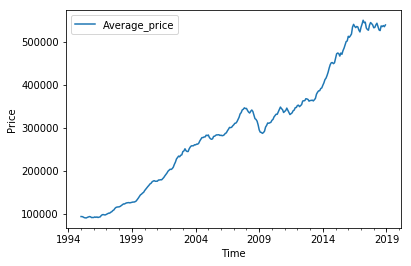

In [32]:
# Let's plot the changes in average price over time, in this case we are only interested in Barnet
barnet_prices = df[df['Borough']=='Barnet']
ax = barnet_prices.plot(kind='line', x='Time', y='Average_price')
ax.set_ylabel('Price')

# Lambda function:

1. Take the column `Time`
2. From each value in that column, extract the year
3. Apply 'extract year function' to each entry in the column 'Time'
4. Store that year as separate column 

`Lambda function` allows us to do this

In [33]:
#So far we have seen different data types such an objects, numerical values, and dates.
# Now we are going to create a new column, based on the date value, that just contains the year. 
df['Year'] = df['Time'].apply(lambda t: t.year)
df.tail()

Borough         ID       Time  Average_price  Year
13804          Sutton  E09000029 2018-12-01    379341.4521  2018
13805   Tower Hamlets  E09000030 2018-12-01    427244.6691  2018
13806  Waltham Forest  E09000031 2018-12-01    440454.9836  2018
13807      Wandsworth  E09000032 2018-12-01    596138.5948  2018
13808     Westminster  E09000033 2018-12-01    985082.2195  2018

In [34]:
# Using the function 'groupby' will help you to calculate the mean for each year and for each Borough. 
## As you can see, the variables Borough and Year are now indices
dfg = df.groupby(by=['Borough', 'Year']).mean()
dfg.sample(10)

Average_price
Borough              Year               
Kingston upon Thames 2011  312073.910233
Hounslow             1997   84535.691348
Southwark            2006  242759.769733
Newham               2011  207663.620742
Lewisham             2005  190867.854550
Enfield              2014  294515.793233
Greenwich            2010  229069.516233
Bromley              1997   94224.688035
Merton               2005  246252.810042
Tower Hamlets        1997   85759.562757

In [35]:
# Let's reset the index
dfg = dfg.reset_index()
dfg.head()

Borough  Year  Average_price
0  Barking & Dagenham  1995   51817.969390
1  Barking & Dagenham  1996   51718.192690
2  Barking & Dagenham  1997   55974.262309
3  Barking & Dagenham  1998   60285.821083
4  Barking & Dagenham  1999   65320.934441

In [36]:
# Now the challenge is to create a function that will calculate a ratio of prices
# This ratio is between the current price of a house (2018) and the price in 1998 (20 years ago)

def create_price_ratio(d):
    y1998 = float(d['Average_price'][d['Year']==1998])
    y2018 = float(d['Average_price'][d['Year']==2018])
    ratio = [y2018/y1998]
    return ratio
# This is only to check that the function is working
create_price_ratio(dfg[dfg['Borough']=='Barking & Dagenham'])

[4.903129165171457]

In [37]:
# Let's create an empty dictionary (where we are going to save the data)
final = {}
# Now let's create a loop that will create subsets of the dataset dfg, by each unique Borough
for bor in dfg['Borough'].unique():
    borough = dfg[dfg['Borough'] == bor]# This is a sub set that only contais the information of a single borough
    final[bor] = create_price_ratio(borough)
# We use the function and incorporate that into a new key of the dictionary 
print(final) 

{'Barking & Dagenham': [4.903129165171457], 'Barnet': [4.36789560068538], 'Bexley': [4.260367557860156], 'Brent': [4.901669009930503], 'Bromley': [4.090613880189152], 'Camden': [4.952644145974594], 'City of London': [5.316601847944833], 'Croydon': [4.201610367098538], 'Ealing': [4.3086159460484925], 'Enfield': [4.27120875676663], 'Greenwich': [4.7917594752419195], 'Hackney': [6.179236934498367], 'Hammersmith & Fulham': [4.152321618609799], 'Haringey': [5.116212573257274], 'Harrow': [4.056399558754149], 'Havering': [4.326987136856101], 'Hillingdon': [4.195860754490591], 'Hounslow': [3.9652114539512313], 'Islington': [4.840929670946651], 'Kensington & Chelsea': [5.116967570666615], 'Kingston upon Thames': [4.272582780341895], 'Lambeth': [4.972690416638007], 'Lewisham': [5.449735902324391], 'Merton': [4.7452387678328884], 'Newham': [5.285445265568602], 'Redbridge': [4.486246107418886], 'Richmond upon Thames': [4.032403016318868], 'Southwark': [5.509513958514962], 'Sutton': [4.131820149478

Now we have a dictionary with data about the ratio between average prices for each borough,  but we can make it looks nicer using the fucntion DataFrame

In [ ]:
#Convert a dictionary to a dataframe
df_ratios = pd.DataFrame(final)
df_ratios.head()

In [ ]:
# Let's transpose the dataframe and reset the indices
df_ratios_T = df_ratios.T
df_ratios = df_ratios_T.reset_index()
df_ratios.head()

In [ ]:
#
df_ratios.rename(columns={'index':'Borough', 0:'2018'}, inplace=True)
df_ratios.head()

In [38]:
#Let's sort in descending order and select the first 15 boroughs
top15 = df_ratios.sort_values(by='2018',ascending=False).head(15)
print(top15)


NameError: name 'df_ratios' is not defined

In [ ]:
#Let's plot the boroughs that have seen the greatest changes in price
ax = top15[['Borough','2018']].plot(kind='bar')
ax.set_xticklabels(top15.Borough)